# Predicting Seminal Quality from Environmental and Lifestyle Factors

## Fertility Data Set

Downloaded from the __[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Fertility)__ on July 10, 2019. The dataset description is as follows:

- Data Set: Multivariate
- Attribute: Real
- Tasks: Classification, Regression
- Instances: 100
- Attributes: 10

### Data Set Information:

Fertility rates have dramatically decreased in the last two decades, especially in men. Literature indicates that environmental factors, as well as lifestyle habits, may affect semen quality. Typically semen quality is assessed in a lab but this procedure is expensive. In this paper, researchers set out to test whether AI techniques could accurately predict the seminal profile of an individual based on environmental factors and life habits. 

100 volunteers between 18 and 36 years old participated in the study. They were asked to provide a semen sample and complete a questionnaire about life habits and health status. 

The data set can be used for the tasks of classification and regression analysis.

### Attribute Information:

There are nine attributes in the dataset:

1. **Season in which the analysis was performed.** 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1) 
2. **Age at the time of analysis.** 18-36 (0, 1) 
3. **Childish diseases**	1) yes, 2) no. (0, 1) 
4. **Accident or serious trauma** 1) yes, 2) no. (0, 1) 
5. **Surgical intervention** 1) yes, 2) no. (0, 1) 
6. **High fevers in the last year** 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1) 
7. **Frequency of alcohol consumption** 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1) 
8. **Smoking habit 1) never, 2) occasional 3) daily.** (-1, 0, 1) 
9. **Number of hours spent sitting per day ene-16**	(0, 1) 

Output: Diagnosis	normal (N), altered (O)	

**Input data has been converted into a range of normalization according to the follow rules:**
1. Numerical variables such as "age" are normalized onto the interval (0, 1). For instance, "age" has a range between the minimum 18 and the maximum 36. This means that the persons that is 36 years old is normalized to the value 1 whereas an individual that is 27 is normalized to the value 9/18 = 0.50.
2. The variables with only two independent attributes ("childish diseases","accident","surgical intervention","number of hours sitting") are pre-arranged with binary values (0, 1).
3. The variables with three independent attributes, such as "High fevers in the last year" and "Smoking habit" are prearranged using the ternary values(-1,0,1).** For example, "Smoking habit" will take -1 for never, 0 represents occasional and 1 daily.
4. The variables with four independent attributes, such as‘‘Season in which the analysis was performed’’ are prearranged using the four different and equaldistance values (-1,-0.33,0.33,1).

### Relevant Papers:

Gil, D., Girela, J. L., De Juan, J., Gomez-Torres, M. J., & Johnsson, M. (2012). Predicting seminal quality with artificial intelligence methods. Expert Systems with Applications, 39(16), 12564-12573.

## Data Exploration and Visualization

In this section we will begin to explore the dataset to determine relevant information.

In [1]:
import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from yellowbrick.features import Rank2D
%matplotlib inline

### Data Ingestion from the UCI repository 

Here we are retrieving dat from the UCI repository. We do this by:
- Write a function using os and requests
- Define the URL
- Define the file name
- Define the location
- Execute the function to fetch the data and save as CSV

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt"

def fetch_data(fname='fertility_Diagnosis.txt'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [3]:
# Here we define the features of the dataset and use panda's read CSV function to read
# the data into a DataFrame, df

FEATURES  = [
    "season_of_analysis", #(winter=-1,spring=-0.33,summer=.33,fall=1) 
    "age", #18-36(0,1)
    "childhood_disease",#(yes=0,no=1)
    "accident_or_trauma",#(yes=0,no=1)
    "surgical_intervention",#(yes=0,no=1)
    "high_fevers",#(less than three months ago=-1, more than three months ago=0, no=1)
    "alcohol",#several times a day, every day, several times a week, once a week, hardly ever or never(0,1)
    "smoking",#never=-1, occasional=0, daily=1
    "hours_sitting", #1-16(0,1)
    "diagnosis"

]

LABEL_MAP = {
    0: "Normal_Diagnosis", 
    1: "Altered_Diagnosis",
}

# Read the data into a DataFrame
df = pd.read_csv(DATA, sep=',', header= None, names=FEATURES)

# Taking a closer look at the data
df.head()

,season_of_analysis,age,childhood_disease,accident_or_trauma,surgical_intervention,high_fevers,alcohol,smoking,hours_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [4]:
# Describe the dataset
print(df.describe())

       season_of_analysis         age  childhood_disease  accident_or_trauma  \
count          100.000000  100.000000         100.000000          100.000000   
mean            -0.078900    0.669000           0.870000            0.440000   
std              0.796725    0.121319           0.337998            0.498888   
min             -1.000000    0.500000           0.000000            0.000000   
25%             -1.000000    0.560000           1.000000            0.000000   
50%             -0.330000    0.670000           1.000000            0.000000   
75%              1.000000    0.750000           1.000000            1.000000   
max              1.000000    1.000000           1.000000            1.000000   

       surgical_intervention  high_fevers     alcohol     smoking  \
count             100.000000   100.000000  100.000000  100.000000   
mean                0.510000     0.190000    0.832000   -0.350000   
std                 0.502418     0.580752    0.167501    0.808728   
min

In [5]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

# Determine the frequency of each class of diagnosis
print(df.groupby('diagnosis')['diagnosis'].count())


100 instances with 10 features

diagnosis
N    88
O    12
Name: diagnosis, dtype: int64


We use **df.describe** to get a summary of our data. We can see that there is no missing data because the "count" for each attribute is 100. 

We see that there are 88 instances of normal diagnosis (N) and 12 instances of altered 
diagnosis (O). This tells us **class imbalance** may be an issue because there are far more instances of normal diagnoses than altered. We've learned that most machine learning algorithms work best when the number of instances of each classes are roughly equal. 

Now let's plot some of the other attributes to get a sense of the frequency distribution. 

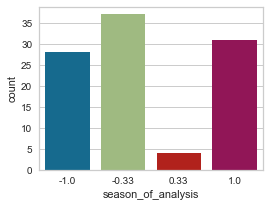

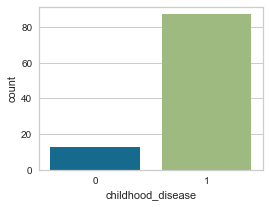

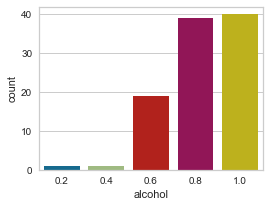

In [6]:
plt.figure(figsize=(4,3))
sns.countplot(data = df, x = 'season_of_analysis')

plt.figure(figsize=(4,3))
sns.countplot(data = df, x = 'childhood_disease')

plt.figure(figsize=(4,3))
sns.countplot(data = df, x = 'alcohol')

These graphs show us that most analyses were preformed in the winter, spring, and fall. Very few were preformed in the summer. 

We also can see that way more participants didn't have a childhood disease, whereas 18 reported they did. 

We also see most of the participants "have one drink a week" or "hardly ever". 

### Data Wrangling
Here we're using Scikit-Learn transformers to prepare data for ML. The **sklearn.preprocessing** package provides utility functions and transformer classes to help us transform input data so that it is better suited for ML. Here we're using **LabelEncoder** to encode the "diagnosis" variable with a value between 0 and n_classes-1 (in our case, 1). 

In [7]:
from sklearn.preprocessing import LabelEncoder

# Extract our X and y data
X = df[FEATURES[:-1]]
y = df["diagnosis"]

# Encode our target variable
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

print(X.shape, y.shape)

(100, 9) (100,)


### Data Visualization

Here we're using Pandas to create various visualizations of our data. 

First, we're creating a matrix of scatter plots of the features in our dataset.  This is useful for understanding how our features interact with eachother. I'm not sure I'm sensing any valuable insight from the scatter matrix below. 

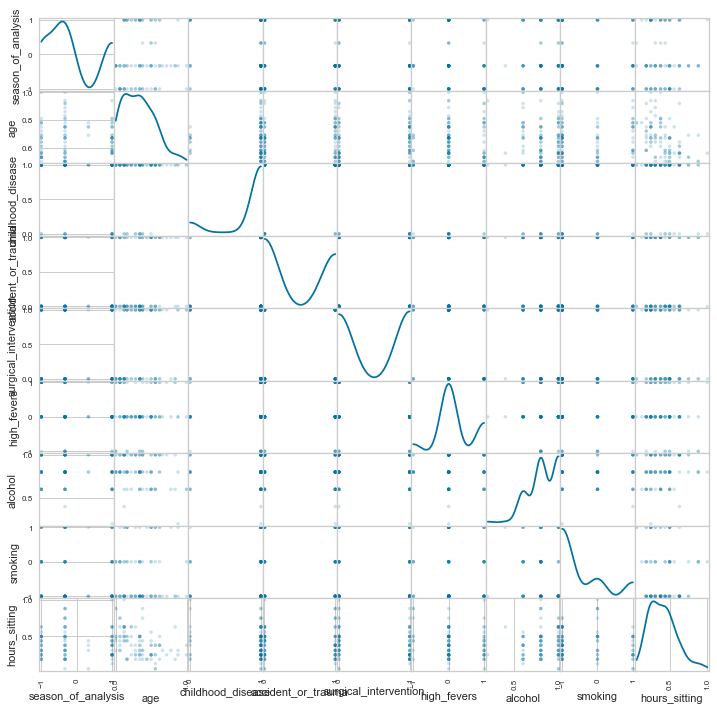

In [8]:
# Create a scatter matrix of the dataframe features using Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

Next, we use parallel coordinates, another approach to analyzing multivariate data. Each line represents an instance from the dataset and the value of the instance for each of the features. The color represents the category of diagnosis. This gives us some insight to common trends of the various color categories. For example, we can see that occasional smokers (0) spend more hours sitting compared to non-smokers (-1).

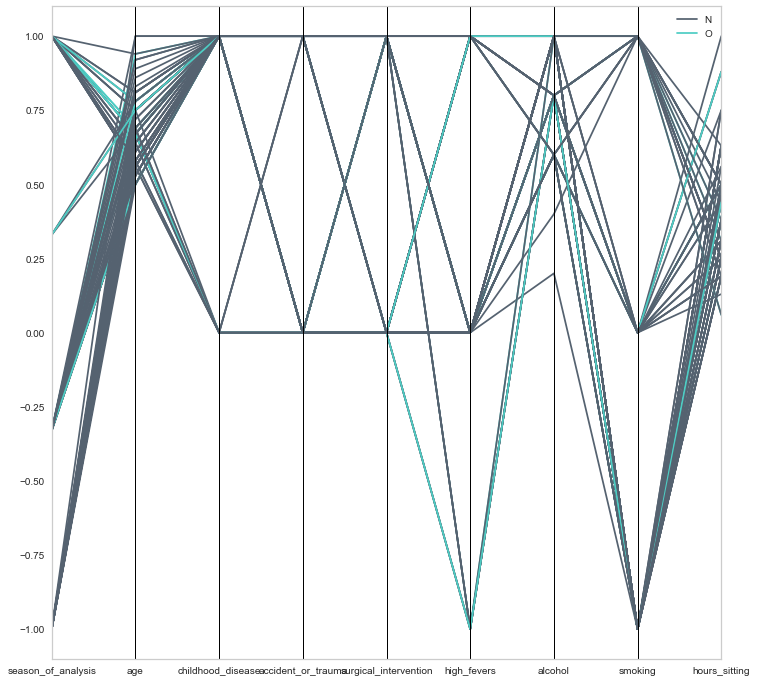

In [9]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'diagnosis', color =('#556270','#4ECDC4'))
plt.show()

Then, we create a radial plot, which normalizes our data and plots the instances relative to our features. This is useful for us to look for clusters and trends happening in the multivariate layer of our dataset. Similar to how a scatter plot shows the interplay of two features this reflects the interaction of a higher dimension of features. While not conclusive, it appears that instances of normal diagnoses are gravitating more toward surgical_intervention.

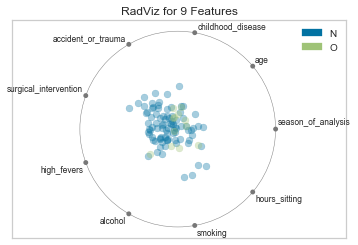

In [10]:
from yellowbrick.features import RadViz

_ = RadViz(classes=encoder.classes_, alpha=0.35).fit_transform_poof(X, y)

## Data Extraction

One way that we can structure our data for easy management is to save files on disk. The Scikit-Learn datasets are already structured this way, and when loaded into a Bunch (a class imported from the datasets module of Scikit-Learn) we can expose a data API that is very familiar to how we've trained on our toy datasets in the past. A Bunch object exposes some important properties:
-  data: array of shape n_samples * n_features
-  target: array of length n_samples
-  feature_names: names of the features
-  target_names: names of the targets
-  filenames: names of the files that were loaded
-  DESCR: contents of the readme

In order to manage our data set on disk, we'll structure our data as follows:



In [11]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.path.abspath(os.path.join( ".", "..", "mollymorrison1670", 'Data'))
print(DATA_DIR)

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print("- {}".format(name))

/Users/mtm101/machine-learning/examples/mollymorrison1670/Data
- README.md
- fertility_Diagnosis.txt
- meta.json


## Data Loading and Management
- Define a function to load data 
- Construct the Bunch object for the data set by defining the paths and file names 
- Load the features and labels from the meta data 
- Load the read me description
- Use Pandas to load data from the txt file
- Extract the target from the data by indexing with column names
- Create a 'Bunch' object, which is a dictionary that exposes dictionary keys as properties so that you can access them with dot notation.

In [12]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the fertility dataset
    filenames     = {
        'meta': os.path.join(root, 'meta.json'),
        'rdme': os.path.join(root, 'README.md'),
        'data': os.path.join(root, 'fertility_diagnosis.txt'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the text file.
    dataset = pd.read_csv('fertility_Diagnosis.txt', delimiter=',', names=FEATURES)
    
    # 'diagnosis' is stored as a text value. We convert (or 'map') it into numeric binaries 
    # so it will be ready for scikit-learn.
    dataset.diagnosis = dataset.diagnosis.map({'N': 0,'O': 1})
    
    # Extract the target from the data
    data = dataset[['season_of_analysis', 'age', 'childhood_disease', 'accident_or_trauma', 'surgical_intervention',
                    'high_fevers', 'alcohol', 'smoking', 'hours_sitting']]
    target = dataset['diagnosis']

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print(dataset.data.shape)
print(dataset.target.shape)

(100, 9)
(100,)


## Classification 

Now that we have a dataset `Bunch` loaded and ready, we can begin the classification process. Let's attempt to build a classifier with kNN, SVM, and Random Forest classifiers. 

### Load the Algorithms!
- Metrics for evaluating performance
- K-Folds cross-validator provides train/test indices to split data in train/test sets.
- SVC algorithm 
- K Neighbors Classifier
- Random Forest Classifier
- Logistic Regression

In [13]:
from sklearn import metrics

from sklearn.model_selection import KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Define a function to evaluate the performance of the models 
- Set our start time
- Define an empty array for our scores variable
- Define our training dataset and our test dataset
- Define estimator and fit to data
- Define predictor and set to data 
- Calculate metrics for evaluating models
- Print evaluation report
- Write estimator to disc for future predictions
- Save model


In [14]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    kf = KFold(n_splits = 12, shuffle=True)

    for train, test in kf.split(dataset.data):
        X_train, X_test = dataset.data.iloc[train], dataset.data.iloc[test]
        y_train, y_test = dataset.target.iloc[train], dataset.target.iloc[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())
    
    # Write official estimator to disk in order to use for future predictions on new data
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    #saving model with the pickle model
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    print("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))
    

In [15]:
# Perform SVC Classification
fit_and_evaluate(dataset, SVC, "Fertility SVM Classifier", gamma = 'auto')

Build and Validation of Fertility SVM Classifier took 0.081 seconds
Validation scores are as follows:

precision    0.781620
recall       0.878472
accuracy     0.878472
f1           0.824644
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/fertility-svm-classifier.pickle


In [16]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "Fertility kNN Classifier", n_neighbors=12)

Build and Validation of Fertility kNN Classifier took 0.081 seconds
Validation scores are as follows:

precision    0.781620
recall       0.878472
accuracy     0.878472
f1           0.824644
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/fertility-knn-classifier.pickle


In [17]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "Fertility Random Forest Classifier")

Build and Validation of Fertility Random Forest Classifier took 0.146 seconds
Validation scores are as follows:

precision    0.835809
recall       0.849537
accuracy     0.849537
f1           0.831324
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/fertility-random-forest-classifier.pickle


In [18]:
fit_and_evaluate(dataset, LogisticRegression , "Fertility Logistic Regression")

Build and Validation of Fertility Logistic Regression took 0.074 seconds
Validation scores are as follows:

precision    0.783661
recall       0.879630
accuracy     0.879630
f1           0.826305
dtype: float64

Fitted model written to:
/Users/mtm101/machine-learning/examples/mollymorrison1670/fertility-logistic-regression.pickle


**Conclusion** While all estimators seemed to be good predictors, I believe the kNN classifier was the best. This is because it has the highest F1 score, which is a measure of the test's accuracy taking into account both the precision and the recall. I'm cautious about the model's accuracy given the high class imbalance.